# Stock Market Data-Analysis

In this project we will be looking at data from the stock market, particularly some technology stocks. We will learn how to use pandas to get stock information, visualize different aspects of it, and finally we will look at a few ways of analyzing the risk of a stock, based on its previous performance history. We will also be predicting future stock prices through a Monte Carlo method!
We'll be answering the following questions along the way:
1. What was the change in price of the stock over time?
2. What was the daily return of the stock on average?
3. What was the moving average of the various stocks?
4. What was the correlation between different stocks' closing prices?
4. What was the correlation between different stocks' daily returns?
5. How much value do we put at risk by investing in a particular stock?
6. How can we attempt to predict future stock behavior?

Obtaining and initializing the data

In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

In [3]:
from datetime import datetime #For date and time calculation
import pandas_datareader.data as pdweb #For obtaining data from web

In [4]:
tech_list = ["AAPL","GOOG","MSFT","AMZN"]
# Apple, Google, Microsoft, Amazon

In [5]:
#Defined timestamp for which we are going to handle data
end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

In [6]:
#obtaining stock values based on time stamp from quandl
for stock in tech_list:
    globals()[stock] = pdweb.get_data_quandl(stock,start,end)

For analysis, converting the imported stocks data to csv file.

In [7]:
AAPL.to_csv("Apple.csv")

In [8]:
GOOG.to_csv("Google.csv")

In [9]:
MSFT.to_csv("Microsoft.csv")

In [10]:
AMZN.to_csv("Amazon.csv")

## Analysing the price trend for stock

In [3]:
AAPL = pd.read_csv("Apple.csv")

In [4]:
AAPL.head()

,Date,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
0,2018-03-27,173.68,175.15,166.92,168.340,38962839.0,0.0,1.0,173.68,175.15,166.92,168.340,38962839.0
1,2018-03-26,168.07,173.10,166.44,172.770,36272617.0,0.0,1.0,168.07,173.10,166.44,172.770,36272617.0
2,2018-03-23,168.39,169.92,164.94,164.940,40248954.0,0.0,1.0,168.39,169.92,164.94,164.940,40248954.0
3,2018-03-22,170.00,172.68,168.60,168.845,41051076.0,0.0,1.0,170.00,172.68,168.60,168.845,41051076.0
4,2018-03-21,175.04,175.09,171.26,171.270,35247358.0,0.0,1.0,175.04,175.09,171.26,171.270,35247358.0


In [5]:
#Arranging stock in ascending order of date. Earliest data first.
#Making Date as the index
AAPL.index = AAPL.Date
AAPL.drop(["Date"],axis=1,inplace=True)
AAPL.sort_index(inplace=True)

In [6]:
AAPL.head()

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
2017-04-13,141.91,142.38,141.05,141.05,17822880.0,0.0,1.0,140.760509,141.226702,139.907475,139.907475,17822880.0
2017-04-17,141.48,141.88,140.87,141.83,16582094.0,0.0,1.0,140.333992,140.730752,139.728933,140.681157,16582094.0
2017-04-18,141.41,142.04,141.11,141.20,14697544.0,0.0,1.0,140.264559,140.889456,139.966989,140.056260,14697544.0
2017-04-19,141.88,142.00,140.45,140.68,17328375.0,0.0,1.0,140.730752,140.849780,139.312335,139.540472,17328375.0
2017-04-20,141.22,142.92,141.16,142.44,23319562.0,0.0,1.0,140.076098,141.762328,140.016584,141.286216,23319562.0


In [7]:
AAPL.describe()

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
count,238.000000,238.000000,238.000000,238.000000,2.380000e+02,238.000000,238.0,238.000000,238.000000,238.000000,238.000000,2.380000e+02
mean,160.991922,162.181172,159.715277,160.970372,2.905140e+07,0.005294,1.0,160.739847,161.927436,159.464894,160.718159,2.905140e+07
std,11.214527,11.354030,11.127911,11.198834,1.209101e+07,0.057630,0.0,11.499251,11.641722,11.406809,11.481832,1.209101e+07
min,141.220000,141.880000,140.450000,140.680000,1.394898e+07,0.000000,1.0,140.076098,140.730752,139.312335,139.540472,1.394898e+07
25%,153.390000,153.982500,152.027500,153.150000,2.069878e+07,0.000000,1.0,152.737774,153.472294,151.626153,152.396658,2.069878e+07
50%,159.415000,160.725000,158.180000,159.770000,2.564205e+07,0.000000,1.0,159.415000,160.710000,158.055000,159.705000,2.564205e+07
75%,172.125000,173.122500,170.517500,171.812500,3.328684e+07,0.000000,1.0,172.125000,173.122500,170.517500,171.812500,3.328684e+07
max,182.590000,183.500000,180.210000,181.720000,8.543608e+07,0.630000,1.0,182.590000,183.500000,180.210000,181.720000,8.543608e+07


In [8]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
Index: 238 entries, 2017-04-13 to 2018-03-27
Data columns (total 12 columns):
Open          238 non-null float64
High          238 non-null float64
Low           238 non-null float64
Close         238 non-null float64
Volume        238 non-null float64
ExDividend    238 non-null float64
SplitRatio    238 non-null float64
AdjOpen       238 non-null float64
AdjHigh       238 non-null float64
AdjLow        238 non-null float64
AdjClose      238 non-null float64
AdjVolume     238 non-null float64
dtypes: float64(12)
memory usage: 24.2+ KB


Let us analyse closing price trend of Apple for time period of 1 year

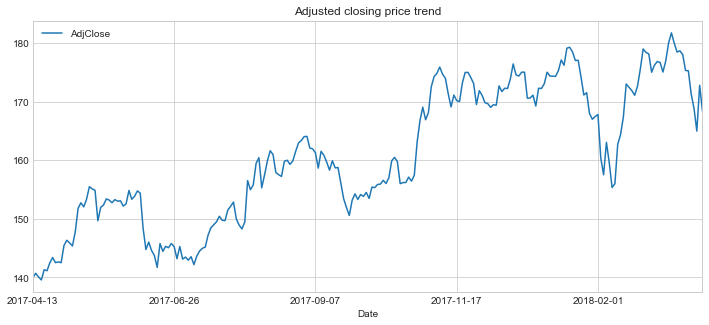

In [9]:
AAPL["AdjClose"].plot(legend=True,figsize=(12,5),title="Adjusted closing price trend")

From above graph we find that the closing price for Apple Inc has risen with some vallyes as well.
Let us see what were the least and most value for Appple's stock

In [10]:
#Highest Closing Value
AAPL.loc[AAPL.AdjClose == AAPL.AdjClose.max()]

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
2018-03-12,180.29,182.39,180.21,181.72,32055405.0,0.0,1.0,180.29,182.39,180.21,181.72,32055405.0


In [11]:
#Least closing value
AAPL.loc[AAPL.AdjClose == AAPL.AdjClose.min()]

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
2017-04-19,141.88,142.0,140.45,140.68,17328375.0,0.0,1.0,140.730752,140.84978,139.312335,139.540472,17328375.0


Let us see trend of purchase of apple's stock by analysing volume

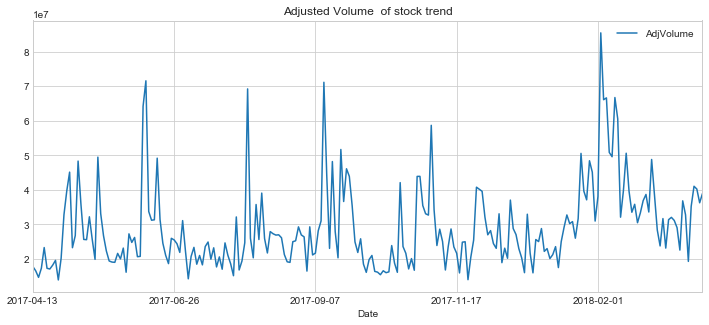

In [12]:
AAPL["AdjVolume"].plot(legend=True,figsize=(12,5),title="Adjusted Volume  of stock trend")

There are quite a lot peaks and valleys. 

## Analysing moving average of stock

Now we will analyse Moving Average (MA) or rolling mean price of Apple's stock.
A moving average (MA) is a widely used indicator in technical analysis that helps smooth out price action by filtering out the “noise” from random price fluctuations. It is a trend-following, or lagging, indicator because it is based on past prices.

For MA calculation a time window is decided. E.g- if window is 5 days, so for 5th day MA will be average of values of 5 days. For 6th day, MA will be average of values from 2nd to 6th day. For 7th day, MA will be average of 3rd to 7th day values and so on.A moving average can help cut down the amount of "noise" on a price chart. 
As a general guideline, if the price is above a moving average the trend is up. If the price is below a moving average the trend is down.

In [13]:
ma_window = [10,20,60] #rolling window durations
for ma in ma_window:
    column_name = "MA for "+str(ma)+" days"
    AAPL[column_name] = pd.Series(AAPL.AdjClose).rolling(window=ma).mean()#Pandas inbuilt method to calculate rolling mean

Text(0.5,1,"Moving Average price for Apple's stock")

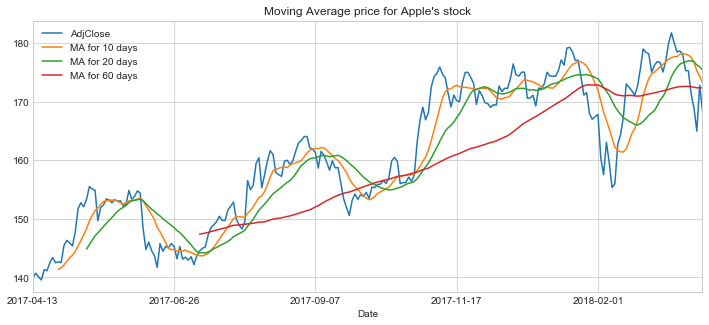

In [14]:
AAPL[['AdjClose','MA for 10 days', 'MA for 20 days', 'MA for 60 days']].plot(figsize=(12,5),subplots=False)
plt.title("Moving Average price for Apple's stock")

The MA analysis shows a smoother curve for longer time window. Various information can be obtained by studying the cross-over points of the curve.

## Analysing daily returns of stock

We'll take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve the daily returns for the Apple stock.

In [15]:
#Positive or negative daily percentage change of stock price
AAPL["Daily Return"] = AAPL["AdjClose"].pct_change()

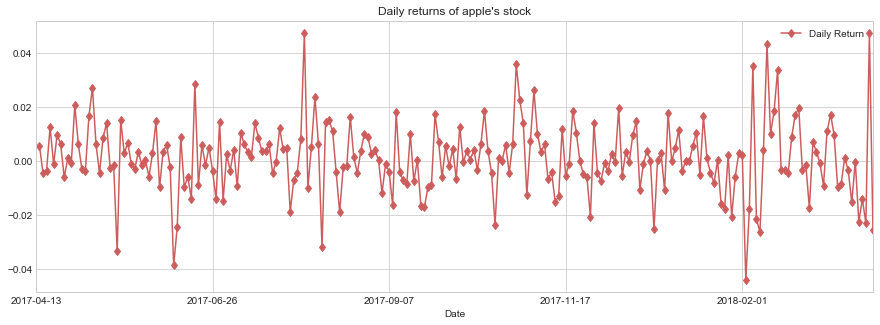

In [16]:
AAPL["Daily Return"].plot(figsize=(15,5),marker="d",title="Daily returns of apple's stock",legend=True,color="indianred")

Highest return was around 5% wahile lowest return was -5%.

To see the general trend let us plot a histogram

Text(0.5,1,'Frequency of daily return-Apple')

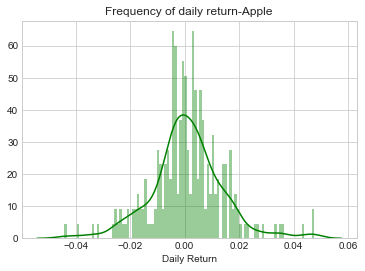

In [17]:
sns.distplot(AAPL["Daily Return"].dropna(),bins = 100,color="Green")
plt.title("Frequency of daily return-Apple")

The daily returns have higher positive value compared to negative one, but the peak tends to jagger below mean.

In [18]:
#Obtaining all the data for remaining companies. This step not required if obtainig data directly from web.
GOOG = pd.read_csv("Google.csv")
AMZN = pd.read_csv("Amazon.csv")
MSFT = pd.read_csv("Microsoft.csv")

In [19]:
GOOG.index = GOOG.Date
GOOG.drop(["Date"],axis=1,inplace=True)
GOOG.sort_index(inplace=True)

In [20]:
AMZN.index = AMZN.Date
AMZN.drop(["Date"],axis=1,inplace=True)
AMZN.sort_index(inplace=True)

In [21]:
MSFT.index = MSFT.Date
MSFT.drop(["Date"],axis=1,inplace=True)
MSFT.sort_index(inplace=True)

In [22]:
GOOG["Daily Return"] = GOOG["AdjClose"].pct_change()
AMZN["Daily Return"] = AMZN["AdjClose"].pct_change()
MSFT["Daily Return"] = MSFT["AdjClose"].pct_change()

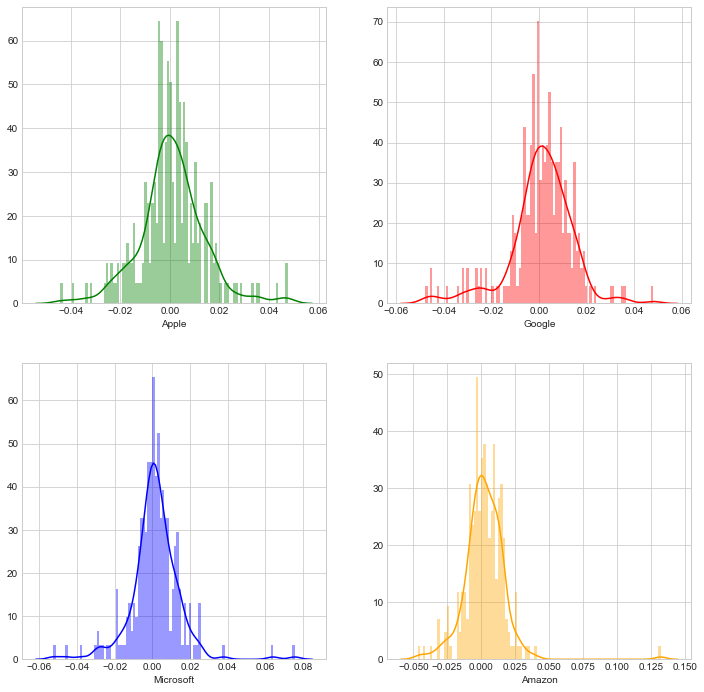

In [23]:
fig,[[ax1,ax2],[ax3,ax4]] = plt.subplots(nrows=2,ncols=2,figsize=(12,12))
sns.distplot(AAPL["Daily Return"].dropna(),bins = 100,color="Green",ax=ax1,axlabel = 'Apple')
sns.distplot(GOOG["Daily Return"].dropna(),bins = 100,color="Red",ax=ax2,axlabel = 'Google')
sns.distplot(MSFT["Daily Return"].dropna(),bins = 100,color="Blue",ax=ax3,axlabel = 'Microsoft')
sns.distplot(AMZN["Daily Return"].dropna(),bins = 100,color="Orange",ax=ax4,axlabel = 'Amazon')

Comparing daily returns for all four tech giants, it is seen that Amazon's stock have higher daily returns compared to other three.

## Now let's analyse trend of Closing Price for tech companies

In [146]:
#creating a data frame of just closing price of all four companies

In [24]:
closing_df = pd.concat([MSFT.AdjClose,AMZN.AdjClose,GOOG.AdjClose,AAPL.AdjClose],axis=1)
closing_df.columns=["MSFT","AMZN","GOOG","AAPL"]

In [25]:
closing_df.head()

,MSFT,AMZN,GOOG,AAPL
2017-04-13,63.921368,884.67,823.56,139.907475
2017-04-17,64.442975,901.99,837.17,140.681157
2017-04-18,64.354400,903.78,836.82,140.056260
2017-04-19,64.009943,899.20,838.21,139.540472
2017-04-20,64.462658,902.06,841.65,141.286216


In [26]:
#Creating a dataframe of daily returns of companies
tech_returns = closing_df.pct_change()

In [27]:
tech_returns.head()

,MSFT,AMZN,GOOG,AAPL
2017-04-13,NaN,NaN,NaN,NaN
2017-04-17,0.008160,0.019578,0.016526,0.005530
2017-04-18,-0.001374,0.001985,-0.000418,-0.004442
2017-04-19,-0.005353,-0.005068,0.001661,-0.003683
2017-04-20,0.007073,0.003181,0.004104,0.012511


Now that we have daily returns, we will find co-variance between different companies and try to find a trend.
Let us see co-variance of a company with itself. It should be a straight line, indicating Pearson Corelation Coefficient (PCC) = 1.

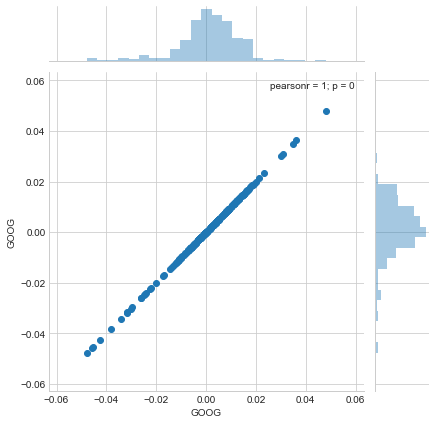

In [28]:
sns.jointplot("GOOG","GOOG",data=tech_returns,kind="scatter")

And we get graph as expected.
So let's go ahead and compare Google and Microsoft the same way.

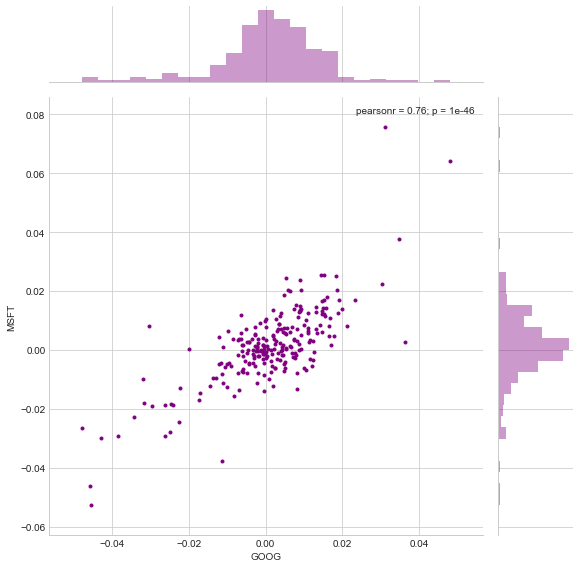

In [29]:
sns.jointplot("GOOG","MSFT",data=tech_returns,size=8,color="purple",joint_kws={"marker":"."})

Co-relation coefficient for Google and Microsoft is 0.76 which very close to one. That means we can say that Google and Microsoft stock prices are closely related.

## FInding corelation between daily returns

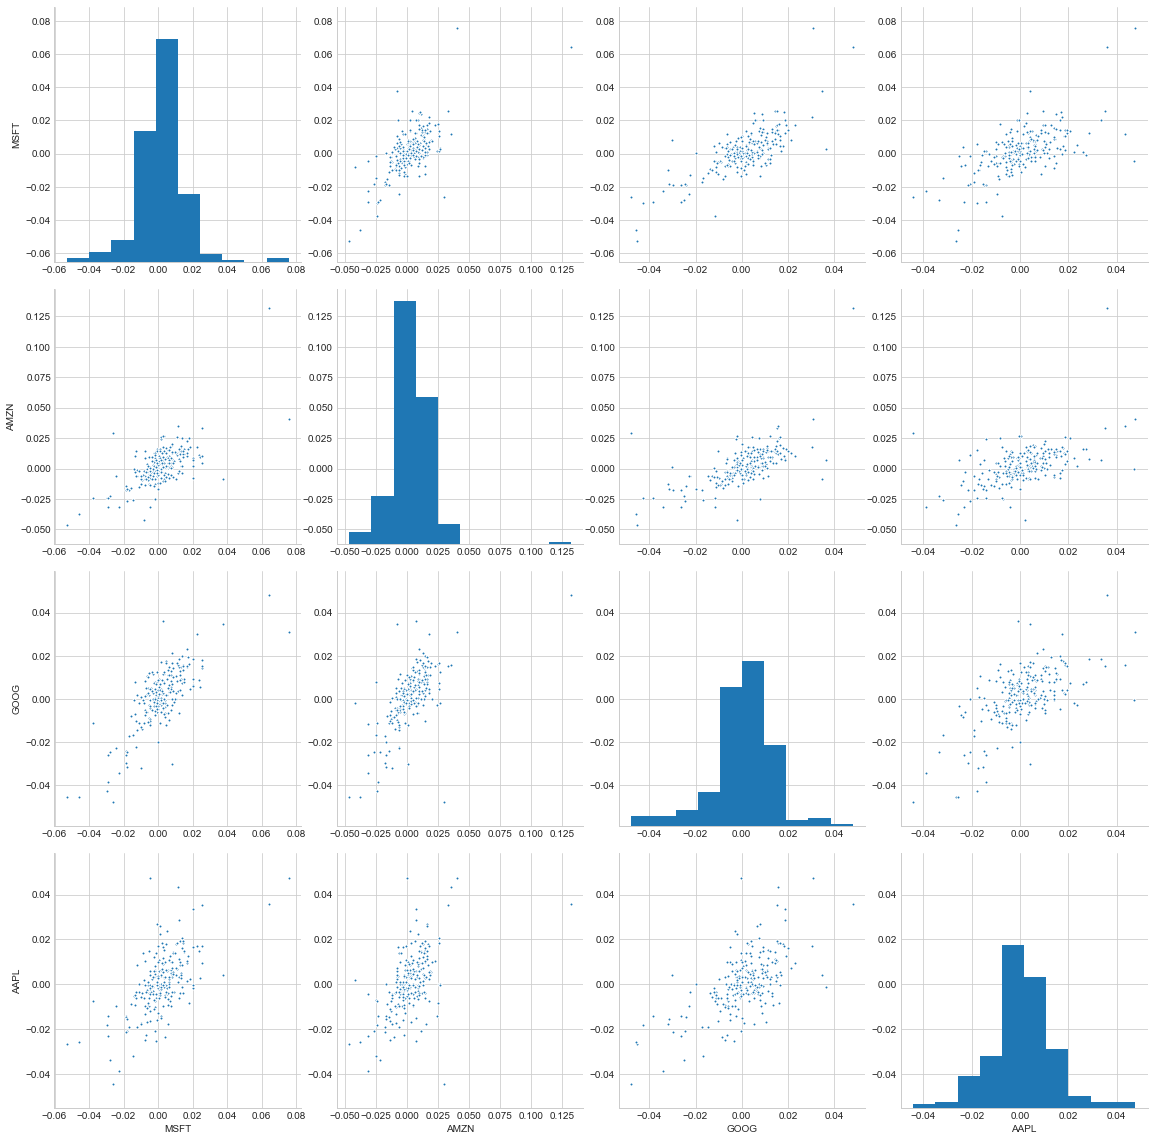

In [30]:
sns.pairplot(tech_returns.dropna(),size=4,plot_kws={"marker":"."})

On comparing different co-relations, all the tech companies have positive linear corelation. 

We also find that slope for Amazon's return is high compared to others. This is because a sudden rise in price of stock of Amazon since end of 2017.

There also doesn't exist a very stron co-relation between Apple and Google as compared to other tech giants.

The above plot can be more customised using sns.PairGrid()

D:\Anaconda3\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


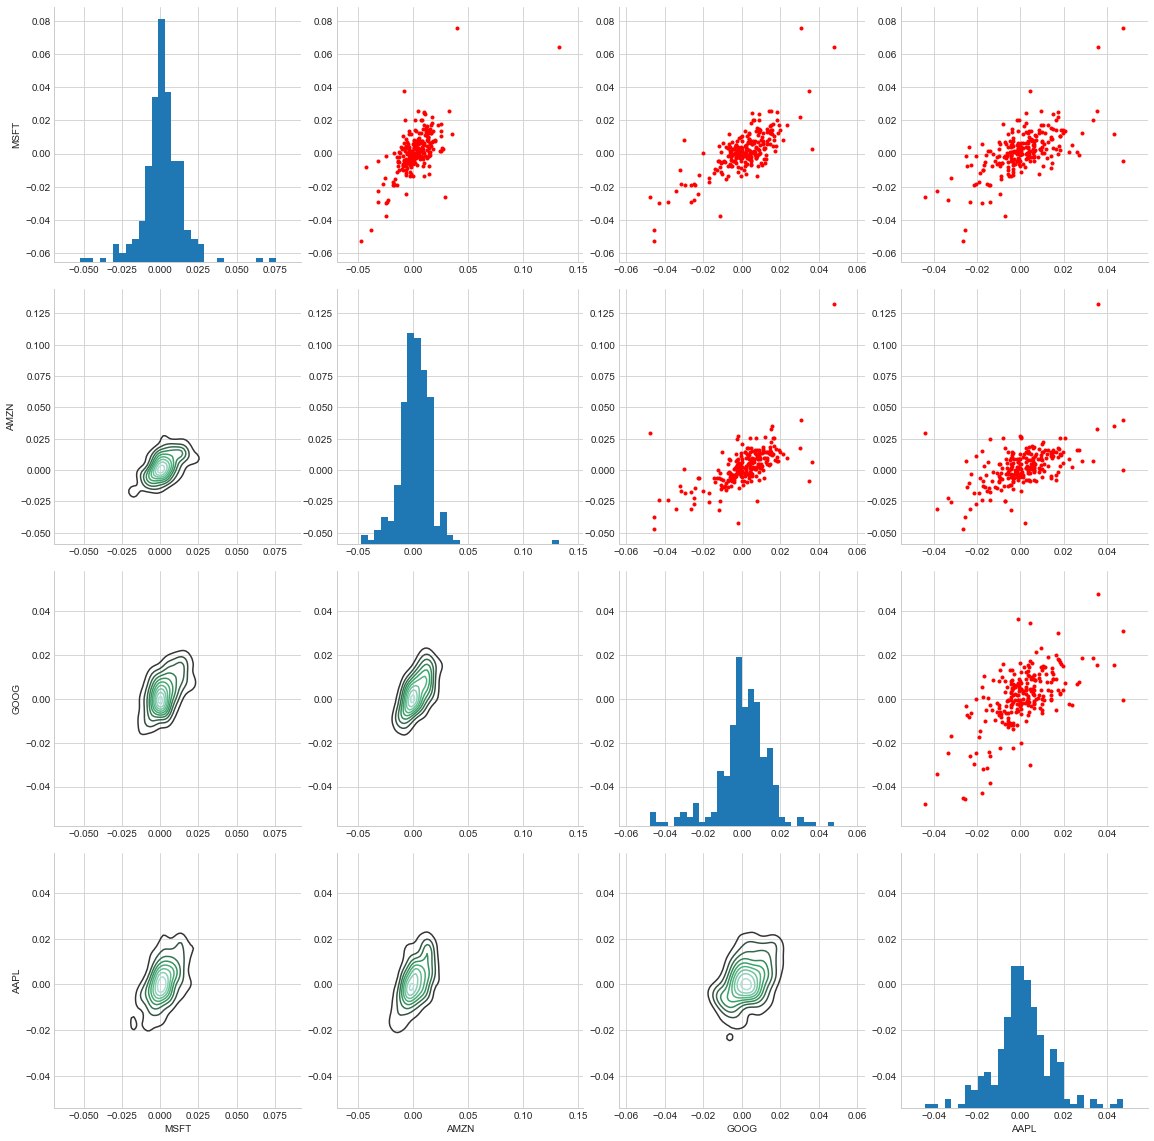

In [31]:
"""Corelation plot for daily returns"""

# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(tech_returns.dropna(),size=4)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,marker=".",color="Red")

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot)

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

We find a strong co-relation between daily returns of Microsoft-Google

Let us plot numeriacl co-relation value and see our assumptions are correct or not

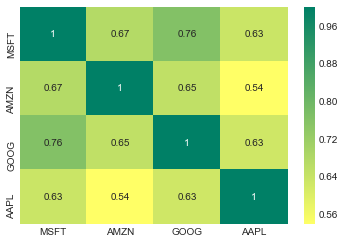

In [32]:
#Daily returns corelation
sns.heatmap(tech_returns.corr(),annot=True,cmap="summer_r")

Upon checking actual values we do find that daily returns for tech stock is positively co-related. The best co-relation is between Google-Microsoft and least co-relation is between Amazon-Apple

## Finding corelation between closing prices

D:\Anaconda3\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


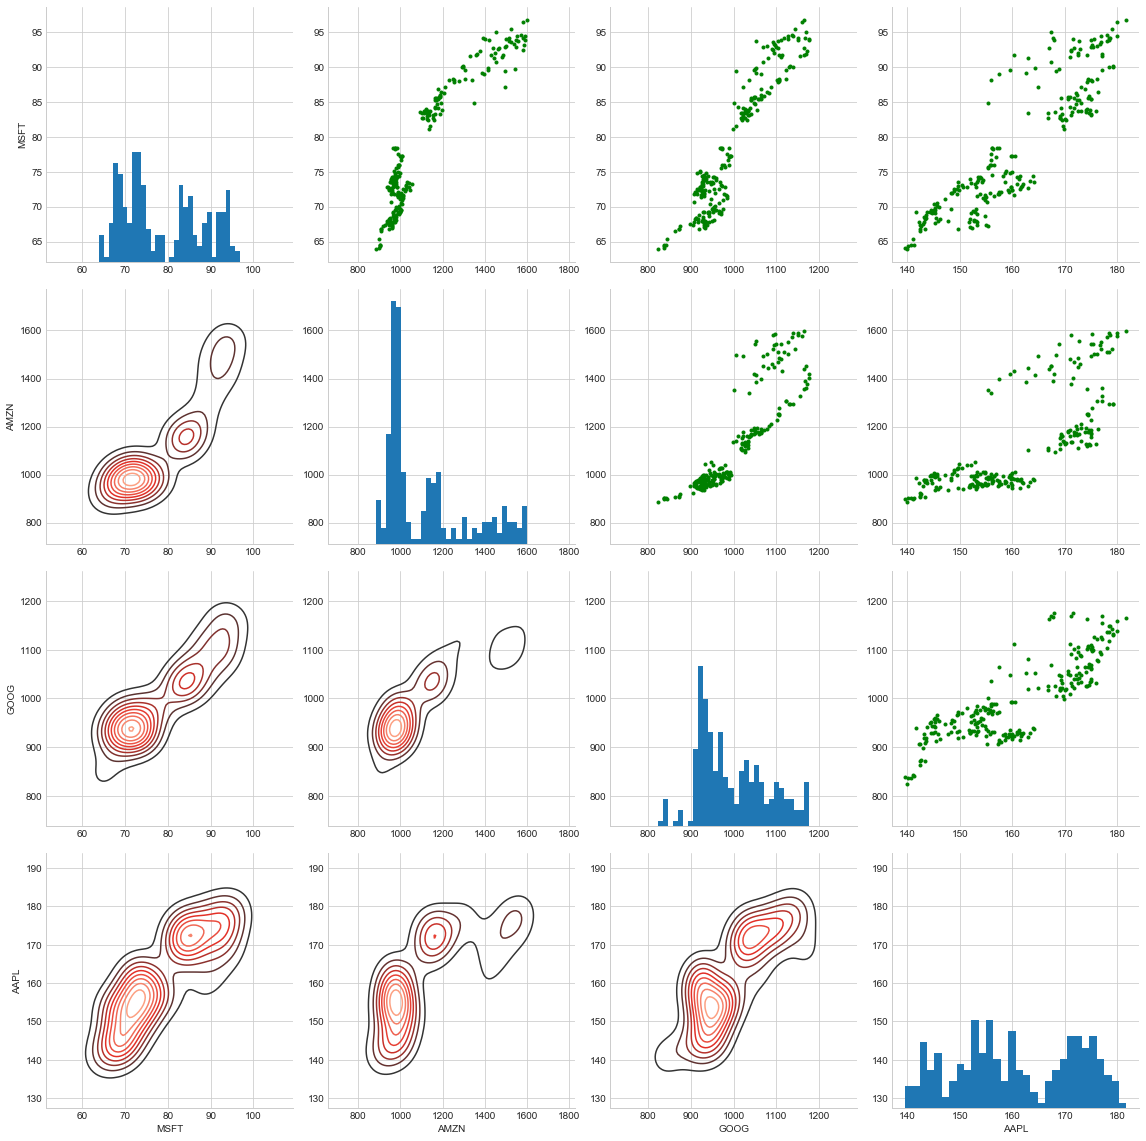

In [33]:
closing_fig = sns.PairGrid(closing_df.dropna(),size=4)
closing_fig.map_upper(plt.scatter, marker=".",color = "green")
closing_fig.map_lower(sns.kdeplot,cmap="Reds_d")
closing_fig.map_diag(plt.hist,bins=30)

From corelation plots of Closing prices, Microsoft, Google and Apple seems to be linearly related. Amazon is also linear to all but it has got few extreme values.

Let us plot the numerical co-relation values.

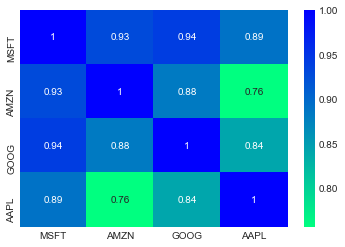

In [34]:
sns.heatmap(closing_df.corr(),annot=True,cmap="winter_r")

Just like daily returns, Closing Prices for Google-Microsoft are strongly corelated while Amazon-Appe are least co-related.

## Risk Analysis

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

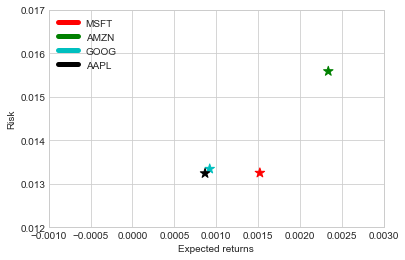

In [60]:
returns_nona = tech_returns.dropna()#Dropping all null values from returns dataframe.
fig = plt.scatter(returns_nona.mean(),returns_nona.std(),marker="*",c=["r","g","c","k"],s=100)
plt.plot([],[],label = "MSFT",color="r",linewidth=5)
plt.plot([],[],label = "AMZN",color="g",linewidth=5)
plt.plot([],[],label = "GOOG",color="c",linewidth=5)
plt.plot([],[],label = "AAPL",color="k",linewidth=5)
plt.xlim([-0.001,0.003])
plt.ylim([0.012,0.017])
plt.xlabel('Expected returns')
plt.ylabel('Risk')
plt.legend()

For better profit, stock needs to give better returns, with less deviation or risk. Microsoft, Apple and Google all have lo risk but Microsoft has better return than two.
Amazon has higher returns but it also has higher risk factor.

## Value at Risk

We can treat value at risk as the amount of money we could expect to lose (aka putting at risk) for a given confidence interval.

### Value at risk using the "bootstrap" method
For this method we will calculate the empirical quantiles from a histogram of daily returns.

Quantiles are cut points dividing the range of a probability distribution into contiguous intervals with equal probabilities

Let us plot a histogram of daily returns of Apple and Amazon

Text(0.5,1,'Daily Returns distribution of Apple')

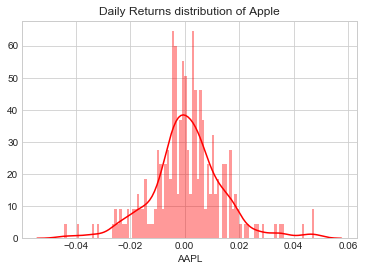

In [65]:
sns.distplot(tech_returns.AAPL.dropna(),bins=100,color="r")
plt.title("Daily Returns distribution of Apple")

The above graph can be divides into various quantiles to estimate the risk involved.

In [68]:
tech_returns["AAPL"].quantile(0.05)

-0.02087586215287609

The 0.05 empirical quantile of daily returns is -0.02. That means with 95% confidence, our worst loss will not excceed 2%.
For example, for 1 million dollar invested our 1-day 5% value at risk will be 0.02*1,000,000 = 20,000.

Let us try for Amazon's stock

Text(0.5,1,'Daily returns distribution of Amazon')

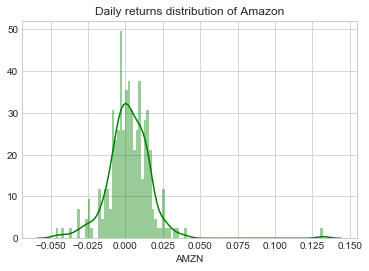

In [70]:
sns.distplot(tech_returns.AMZN.dropna(),bins=100,color="g")
plt.title("Daily returns distribution of Amazon")

In [71]:
tech_returns["AMZN"].quantile(0.05)

-0.02261962439927851

For Amazon we find that risk involved with 95% confidence is 2.2%, which means it has higher risk compared to Apple's stock.

### Value at risk using "Monte Carlo" method

Using the Monte Carlo we run many trials with random market conditions, then we calculate portfolio losses for each trial. After this, we use the aggregation of all these simulations to establish how risky the stock is.

ΔS=S(μΔt+σϵΔt√(Δt))

S = Stock Price
σ = Standard Deviation
ϵ = Random variable

Now we see that the change in the stock price is the current stock price multiplied by two terms. The first term is known as "drift", which is the average daily return(μ) multiplied by the change of time(Δt). The second term is known as "shock", for each time period the stock will "drift" and then experience a "shock" which will randomly push the stock price up or down. By simulating this series of steps of drift and shock thousands of times, we can begin to do a simulation of where we might expect the stock price to be.

In [74]:
days = 365
dt  =1/days
mu = returns_nona["GOOG"].mean()
sigma = returns_nona["GOOG"].std()

In [86]:
#Function to calulate stock price over a time period
def monte_carlo(start_price,days,mu,sigma):
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        shock[x] = np.random.normal(loc=sigma * dt, scale= sigma * np.sqrt(dt))
        drift[x] = mu*dt
        price[x] = price[x-1]+(price[x-1]*(drift[x]+shock[x]))
        
    return price

Text(0.5,1,'Monte Carlo Analysis for Google')

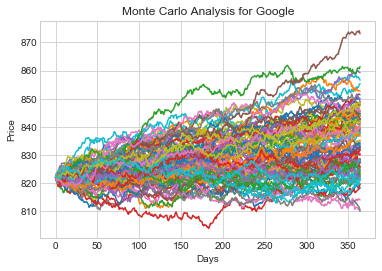

In [87]:
start_price = 822.14

for run in range(100):
    plt.plot(monte_carlo(start_price,days,mu,sigma))

plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Google')

The above graph shows extimated price of Google's stock over a time period of 1 year using monte-carlo method. To grab out more meaningful information, we will plot a histogram of the end result, by running the same simulation for a much longer iteration.

In [88]:
simulation = np.zeros(10000)

for run in range(10000):
    simulation[run] = monte_carlo(start_price,days,mu,sigma)[days-1]


In [90]:
np.set_printoptions(threshold=5) # Suppresses output of array

Text(0.5,1,'Final price distribution for Google Stock after 365 days')

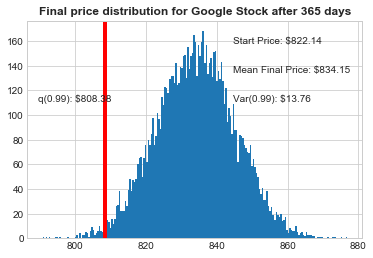

In [96]:
plt.hist(simulation,bins=200)

q = np.percentile(simulation,1) #1% empirical quantile

plt.figtext(0.6,0.8,s="Start Price: $%.2f" %start_price) # Starting Price
plt.figtext(0.6,0.7,s="Mean Final Price: $%.2f" %simulation.mean()) # Mean ending price
plt.figtext(0.6,0.6,s="Var(0.99): $%.2f" %(start_price-q)) # Variance of the price (within 99% confidence interval)
plt.figtext(0.15,0.6,s="q(0.99): $%.2f" %q) # Display 1% quantile
plt.axvline(x=q,linewidth=4,color="r") # Plot a line at the 1% quantile result
plt.title("Final price distribution for Google Stock after %s days" % days, weight='bold')

From the simulation we can say that 99% of the time, the maximum loss from Goggle stock can be at max $13.76

This basically menas for every initial stock purchased, about $13.76 is at risk 99% of the time from our Monte Carlo Simulation.